In [1]:
print("Hakuna matata")

Hakuna matata


In [3]:
import tensorflow as tf
from tensorflow import keras

img_height = 224 # Example image height
img_width = 224 # Example image width
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]



In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/FruitinAmazon.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
train_dir = '/content/FruitinAmazon/train'

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset='training',
seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [8]:

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset='validation',
seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [9]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
for layer in base_model.layers:
  layer.trainable = False

In [12]:


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))



In [13]:


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,411,974 (154.16 MB)

 Trainable params: 25,697,286 (98.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





In [15]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.2018 - loss: 9.5926 - val_accuracy: 0.3889 - val_loss: 4.6461
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.3911 - loss: 9.7260 - val_accuracy: 0.6667 - val_loss: 1.8368
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.6437 - loss: 6.9325 - val_accuracy: 0.9444 - val_loss: 0.2683
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.8446 - loss: 4.3374 - val_accuracy: 0.8889 - val_loss: 0.5185
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.8446 - loss: 2.1687 - val_accuracy: 0.7222 - val_loss: 1.0908
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9253 - loss: 0.1959 - val_accuracy: 0.8333 - val_loss: 0.9081
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.7222 - val_loss: 1.4415
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.9076 - loss: 0.2099 - val_accuracy: 0.9444 - val_loss: 

In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8333 - loss: 0.9753
Validation Accuracy: 0.83


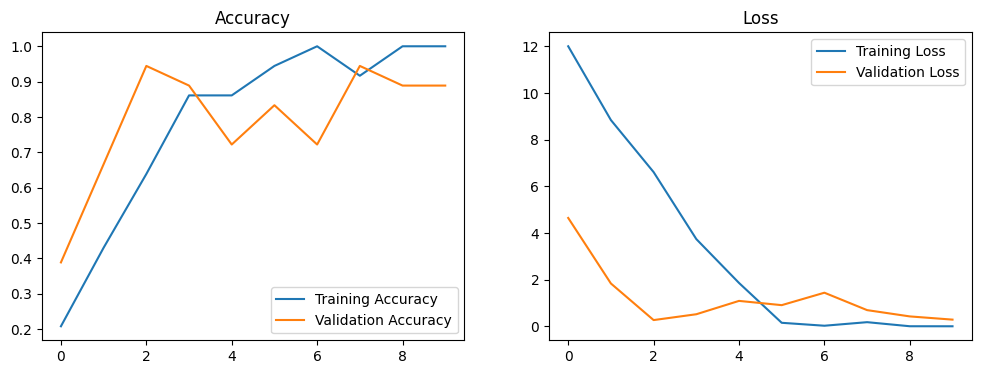

In [16]:
#plot for test data
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [17]:
test_dir = "/content/FruitinAmazon/test"  # Replace with your test data path

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    interpolation='nearest',
    seed=123
)


test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [18]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4333 - loss: 2.2514
Test Accuracy: 0.4333
Test Loss: 2.2514


#Fine Tuining

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop

In [20]:
base_model = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [21]:
base_model.trainable = True

set_trainable = False

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [22]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [23]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [24]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1497 - loss: 1.9379 - val_accuracy: 0.2778 - val_loss: 1.5815
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.4874 - loss: 1.3848 - val_accuracy: 0.6111 - val_loss: 1.3580
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.8299 - loss: 1.1026 - val_accuracy: 0.7778 - val_loss: 1.1370
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.9674 - loss: 0.8724 - val_accuracy: 0.7778 - val_loss: 1.1884
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.9931 - loss: 0.6788 - val_accuracy: 0.8889 - val_loss: 0.6829
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.9891 - loss: 0.5701 - val_accuracy: 0.8889 - val_loss: 0.7354
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 1.0000 - loss: 0.4310 - val_accuracy: 0.8333 - val_loss: 0.6656
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 1.0000 - loss: 0.3273 - val_accuracy: 0.8333 - val_loss: 0.

In [26]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8889 - loss: 0.4290
Validation Accuracy: 0.89


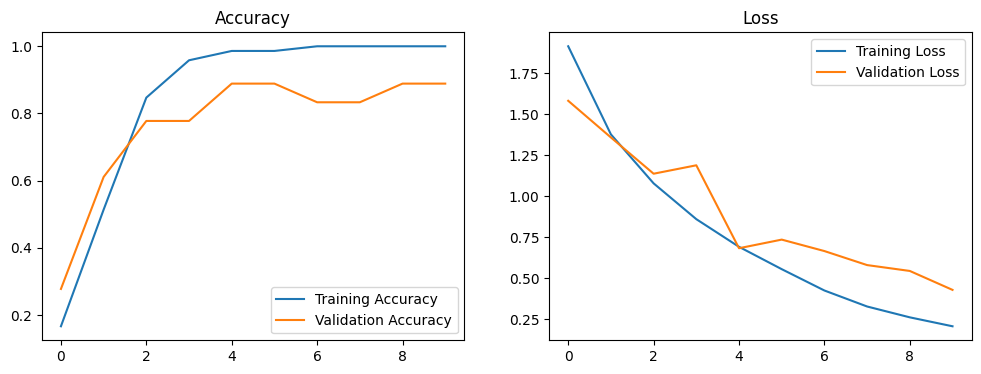

In [27]:
#plot for test data
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [28]:
test_dir = "/content/FruitinAmazon/test"  # Replace with your test data path

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    interpolation='nearest',
    seed=123
)


test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [29]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2333 - loss: 1.5144
Test Accuracy: 0.2333
Test Loss: 1.5144
